<a href="https://colab.research.google.com/github/jieunlee-hi/Portfolio/blob/main/environment_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()
from google.colab import drive
drive.mount('./drive')


Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
data_path ='/content/drive/MyDrive/'
df=pd.read_excel(data_path + '1year_environment_issue.xlsx', header=None, index_col=None)
df.rename(columns={0: "News", 1: "Date"}, inplace=True)
df.tail()


News      Date
32139       잦은 가동 중단, 보수 소홀…경주시 쓰레기소각장 계약 해지  20220731
32140     "코로나19에 폐기물발생량 감축 실패…지속가능 목표와 반대로"  20220731
32141       1만 년 태고의 신비 간직한 제주 벵뒤굴…불의 길 따라가다  20220731
32142  태풍 '송다' 영향에 전국 비 소식…제주 등 남부지방 50∼100㎜  20220731
32143     페이스북 전 CTO "내가 기후 변화에 집중하게 된 이유는…"  20220731

In [ ]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 453 kB 52.1 MB/s 


In [ ]:
#결측치확인
df.isna().sum()

News        0
Date        0
DateTime    0
Year        0
Month       0
dtype: int64

In [ ]:
df['Date']

0        20210801
1        20210801
2        20210801
3        20210801
4        20210801
           ...   
32139    20220731
32140    20220731
32141    20220731
32142    20220731
32143    20220731
Name: Date, Length: 32144, dtype: int64

In [ ]:
#int64 타입인 date컬럼을 날짜 로 변경
df['DateTime'] = pd.to_datetime(df['Date'].astype(str), format='%Y%m%d')

In [ ]:
#결측치확인
df.isnull().sum()


News        0
Date        0
DateTime    0
dtype: int64

In [ ]:
#데이터기간
print(df['DateTime'].min())
print(df['DateTime'].max())


2021-08-01 00:00:00
2022-07-31 00:00:00


In [ ]:
#연도와 월 추출
df['Year'] = df['DateTime'].dt.year 
df['Month'] = df['DateTime'].dt.month 


df.head()

News      Date   DateTime  Year  Month
0      [날씨] 전국 흐리고 비…대부분 지역 폭염특보 유지  20210801 2021-08-01  2021      8
1           짧은 장마·폭염에… 낙동강·금강 녹조 몸살  20210801 2021-08-01  2021      8
2           양양군번영회, 풍력발전단지 조성 철회 촉구  20210801 2021-08-01  2021      8
3     수도권 등에 호우 예비특보…내일 밤까지 전국 많은 비  20210801 2021-08-01  2021      8
4  추미애 "지금 벽화 가지고 떠들 때냐…완전히 구석기 정치"  20210801 2021-08-01  2021      8

In [ ]:
#데이터형확인
df.dtypes

News                object
Date                 int64
DateTime    datetime64[ns]
Year                 int64
Month                int64
dtype: object

In [ ]:
df1=df.groupby('Month')['News']
df1

In [ ]:
df1=df.groupby('Month')['News'].count()
df1=pd.DataFrame({'count':df1})

df1

count
Month       
1       2482
2       2216
3       2642
4       2506
5       2598
6       2993
7       2896
8       2438
9       2496
10      2864
11      3219
12      2794

In [ ]:
df['News'][df['Month']==1].to_list()

['[날씨] 전국 흐리다 맑아져…중부지방 등 눈·비 소식',
 '공공부문 친환경선박 선제 도입…올해 47척 신규 건조·30척 친환경설비 설치',
 '임인년 새해 밀양에 떠오르는 태양',
 '밀양 검은 호랑이 해 첫 태양',
 '밀양 임인년 첫 태양과 제트스키',
 '여명이 밝아오는 밀양의 임임년 새해',
 '호랑이 기운 가득담은 밀양 첫 태양',
 '[내주날씨] 낮에는 기온 영상권…5∼6일 제주에 비 소식',
 '[호랑이 이야기①] 100년 만에 호랑이 97%가 사라졌다',
 "[르포] 담벼락 곳곳에 호랑이 '어흥'…안성 복거마을 가보니",
 "[내일날씨] 전국 곳곳 미세먼지 '나쁨'…낮부터 영상기온 회복",
 '고속도로에서 바라본 임인년 새해 일출',
 '고속도로에서 바라본 임인년 새해 일출',
 '고속도로에서 바라본 임인년 새해 일출',
 '고속도로에서 바라본 임인년 새해 일출',
 '임인년 새해 여명',
 '임인년 새해 여명',
 '임인년 새해 여명',
 '임인년 새해 여명',
 '주식에서 양봉은 그 양봉이 아닙니다[코주부 베이직]',
 '원주국토청, 하천관리 업무 원주환경청으로 이관…물관리 일원화',
 '[새해에는] 명현관 해남군수 "ESG 윤리경영, 군정발전 원동력"',
 '[2030 새만금] ③4조원 넘게 쏟아부었지만…수질 개선은 진행형(끝)',
 "사자성어로 본 전북 지자체 새해 다짐…화두는 '역경 극복'",
 "새해 첫날 전국 맑다가 구름…미세먼지 '좋음'",
 "새해 '폐기물처리시설' 검사 강화…1080개 폐기물처리시설 대상",
 '[날씨] 새해 첫 출근길 영하 추위…수도권·강원 밤부터 눈',
 '소각장·매립장 등 폐기물처리시설 검사 강화',
 '가장 맑았던 작년 서울 하늘…초미세먼지 농도 역대 최저',
 "EU, 원자력 발전 '녹색분류'…원전 빠진 K-택소노미도 바뀔까",
 'EU 택소노미 초안에 원전 포함되자 한국 원전업계 기대하지만…',
 '제주, 기후변화영향평가·환경자원총량관리·환경보전기여금 도입',
 "EU, 원전을 '녹색사업'으로 분

In [ ]:
from konlpy.tag import Okt
from collections import Counter

for i in range(1,12):
  news=df['News'][df['Month']==i].to_list()
  #news=df['News'].to_list()
  #print(news)
  # Okt 함수를 이용해 형태소 분석
  okt = Okt()
  all_data_frame=[]
  append = all_data_frame.extend
  line =[]
  for num in news:
    line = okt.pos(num)
    n_adj =[]
    # 명사 또는 형용사인 단어만 n_adj에 넣어주기
    for word, tag in line:
        if tag in ['Noun','Adjective']:
            n_adj.append(word)
    #print(n_adj)

    #제외할 단어 추가
    stop_words = "하자 곳 도 관 환경 등 명 개 낮 위 첫 곳곳 제 올해 종합 감 날 중 회 종 진" #추가할 때 띄어쓰기로 추가해주기
    stop_words = set(stop_words.split(' '))

    # 불용어를 제외한 단어만 남기기
    n_adj = [word for word in n_adj if not word in stop_words]
    #print(n_adj)
    append(n_adj)
    #가장 많이 나온 단어 100개 저장
    counts = Counter(all_data_frame)
    tags = counts.most_common(100)
    print(tags)

  df1=pd.DataFrame({'month':i,'tags':tags})
  print(df1)


Streaming output truncated to the last 5000 lines.
[('탄소', 97), ('날씨', 75), ('미세먼지', 75), ('중립', 67), ('지원', 64), ('장관', 64), ('초미세먼지', 60), ('기후', 54), ('전국', 52), ('눈', 50), ('시설', 50), ('사업', 47), ('한정애', 44), ('서울', 42), ('센터', 41), ('주의보', 41), ('친환경', 40), ('낙동강', 40), ('수도권', 39), ('영하', 38), ('추진', 38), ('폐기물', 37), ('물질', 37), ('복원', 37), ('추위', 36), ('배출', 36), ('지역', 35), ('국가', 34), ('관리', 33), ('제주', 33), ('조치', 33), ('봄', 32), ('쓰레기', 31), ('경남', 31), ('습지', 31), ('아침', 30), ('설치', 30), ('비', 30), ('인천', 30), ('재활용', 29), ('공원', 29), ('조성', 29), ('위기', 28), ('해양', 28), ('보호', 28), ('환경부', 27), ('생태', 27), ('단체', 27), ('발령', 27), ('시', 26), ('업체', 26), ('기술', 26), ('피해', 26), ('물', 26), ('검', 25), ('조사', 25), ('생태계', 25), ('국제', 24), ('소식', 24), ('서산', 24), ('기온', 24), ('나쁨', 24), ('흰꼬리수리', 24), ('지구', 23), ('확대', 23), ('울산', 23), ('대선', 23), ('개발', 23), ('발견', 22), ('방문', 22), ('정부', 21), ('대응', 21), ('해제', 21), ('한국', 21), ('예비', 21), ('도심', 20), ('에너지', 20), ('원전', 20),

KeyboardInterrupt: ignored

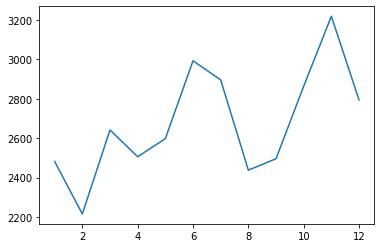

In [ ]:
#시각화
plt.plot(df.groupby('Month')['News'].count())

In [ ]:
from konlpy.tag import Okt
from collections import Counter
news=df['News'].to_list()
print(news)
# Okt 함수를 이용해 형태소 분석
okt = Okt()
all_data_frame=[]
append = all_data_frame.extend
line =[]
for num in news:
  line = okt.pos(num)
  n_adj =[]
  # 명사 또는 형용사인 단어만 n_adj에 넣어주기
  for word, tag in line:
      if tag in ['Noun','Adjective']:
          n_adj.append(word)
  #print(n_adj)

  #제외할 단어 추가
  stop_words = "하자 곳 도 관 환경 등 명 개 낮 위 첫 곳곳 제 올해 종합 감 날 중 회 종 진" #추가할 때 띄어쓰기로 추가해주기
  stop_words = set(stop_words.split(' '))

  # 불용어를 제외한 단어만 남기기
  n_adj = [word for word in n_adj if not word in stop_words]
  #print(n_adj)
  append(n_adj)

print(all_data_frame)

['[날씨] 전국 흐리고 비…대부분 지역 폭염특보 유지', '짧은 장마·폭염에… 낙동강·금강 녹조 몸살', '양양군번영회, 풍력발전단지 조성 철회 촉구', '수도권 등에 호우 예비특보…내일 밤까지 전국 많은 비', '추미애 "지금 벽화 가지고 떠들 때냐…완전히 구석기 정치"', "'계곡 불법행위 강력 대응' 경기도, 주말 직접 특별 현장점검", '미국, 지붕 태양광발전 늘리려 ‘자동 허가’ 프로그램 만들어', "춘천시 수돗물 단수 대란 이어 폭염 악취로 '이중고'", '바닷속 해양쓰레기 줍는 원희룡 지사', '바닷속 해양쓰레기 줍는 원희룡 지사', '바닷속 해양쓰레기 줍는 원희룡 지사', '기상청 "울산 북구 동북동쪽서 규모 2.2 지진 발생"', '전국에 비...기온 일시 하락에도 한증막 더위 예고', '세계 이산화탄소 배출 상위 10개 발전소 중 ‘한국 3개’ 최다', '화학사고 대피장소 안내표지판 시범설치…지도 검색도 가능', '울산·여수 등 5곳에 화학사고 대피장소 안내표지판 시범 설치', '조선소 집단 피부질환, 도료에 든 과민성 물질이 원인', '"화학사고 대피장소, 안내표지판 보고 쉽게 확인해요"…100개소에 시범설치', 'LG엔솔 "2050년 탄소중립 달성"…ESG 비전 발표', '동해안 고수온에 강도다리 등 양식 물고기 15만마리 폐사', '충남농업기술원 "여름철 독버섯 주의…야생버섯 채취 금지"', '연일 폭염에 낙동강·대청호 녹조 확산…작년보다 심해', '재활용도 ‘완결’이 중요하다', '[일본] 거리가 깨끗한 건 꼼꼼한 법 때문', '미지의 금광, 쓰레기 전쟁이 시작됐다', '7억 년 뒤 지구는 쓰레기로 기억된다', "기업도 재생 에너지 구매…'REC 거래 시장' 열린다", "우리연안 서식 공식 확인 '올리브바다거북'…8월 이달의 해양생물에 선정", 'SK에코플랜트, 폐기물 소각기업 3곳 추가 인수…"환경기업 도약"', "LG에너지솔루션, ESG 비전 발표…'2050 탄소중립' 목표 재확인", '비 와서 시원해지나 했더니…그냥 ‘습하고 더

In [ ]:
#가장 많이 나온 단어 100개 저장
counts = Counter(all_data_frame)
tags = counts.most_common(100)
print(tags)

[('탄소', 1848), ('날씨', 1371), ('중립', 1358), ('장관', 1197), ('전국', 1154), ('기후', 1124), ('미세먼지', 1093), ('환경부', 1013), ('사업', 938), ('비', 873), ('서울', 768), ('배출', 731), ('제주', 731), ('친환경', 715), ('위기', 652), ('한정애', 644), ('시설', 622), ('관리', 617), ('지원', 604), ('쓰레기', 599), ('추진', 585), ('최고', 584), ('대응', 575), ('지구', 556), ('기후변화', 549), ('협약', 544), ('폐기물', 539), ('공원', 531), ('한국', 516), ('정부', 511), ('조성', 506), ('지역', 497), ('세계', 496), ('물', 489), ('개최', 486), ('플라스틱', 475), ('개발', 464), ('해양', 462), ('온실가스', 454), ('생태', 452), ('촉구', 450), ('감축', 449), ('에너지', 444), ('단체', 434), ('산업', 429), ('소식', 421), ('부산', 418), ('기온', 416), ('인천', 411), ('점검', 408), ('기업', 408), ('피해', 408), ('발견', 403), ('수도권', 398), ('정책', 395), ('국제', 389), ('기술', 386), ('최대', 382), ('낙동강', 380), ('센터', 366), ('경남', 365), ('원전', 364), ('초미세먼지', 364), ('재활용', 357), ('주의보', 352), ('개선', 349), ('물질', 347), ('처리', 346), ('운영', 345), ('산림', 343), ('숲', 331), ('캠페인', 330), ('녹색', 328), ('조사', 328), ('협력', 326

In [ ]:
all_words_df=pd.DataFrame(tags)
all_words_df.rename(columns={0: "word", 1: "count"}, inplace=True)
all_words_df.sort_values("count",ascending=False)

word  count
0    탄소   1848
1    날씨   1371
2    중립   1358
3    장관   1197
4    전국   1154
..  ...    ...
95   시행    288
96   시민    288
97   오늘    287
98   남부    287
99   국내    286

[100 rows x 2 columns]

In [ ]:
# 이미지 추가(워드크라우드 모양 설정)
import numpy as np
from PIL import Image

mask = Image.new("RGBA",(424,369), (255,255,255)) #(2555,2575)는 사진 크기, (255,255,255)는 색을의미
image = Image.open('/content/drive/MyDrive/heart2.png').convert("RGBA")
x,y = image.size
mask.paste(image,(0,0,x,y),image)
mask = np.array(mask)


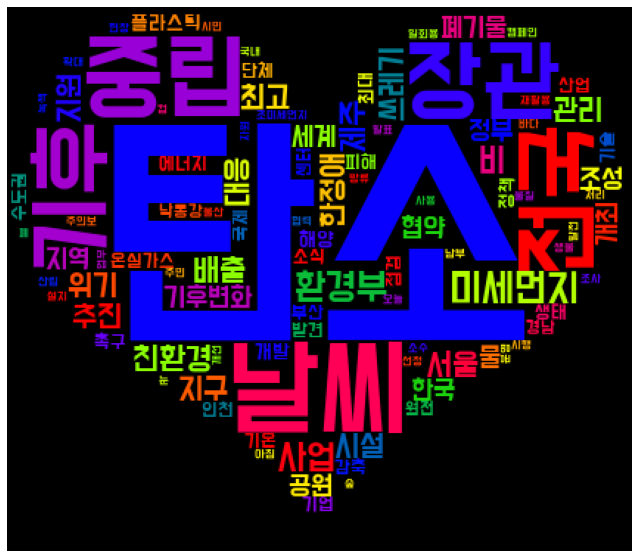

In [ ]:
from wordcloud import WordCloud
###WordCloud(워드크라우드) 만들기###
#폰트지정
font='/content/drive/MyDrive/BMDOHYEON_ttf.ttf'
word_cloud = WordCloud(font_path=font, background_color='black',max_font_size=200, mask=mask,colormap='prism').generate_from_frequencies(dict(tags))



# 사이즈 설정 및 화면에 출력
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.imshow(word_cloud)
plt.axis('off')

#워드클라우드 사진으로 저장
#cloud.to_file('상암맛집_wc.png')
#또는
plt.savefig('news.png', bbox_inches='tight')
plt.show()

In [ ]:
from konlpy.tag import Okt
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
data_path ='/content/drive/MyDrive/'
df=pd.read_excel(data_path + '1year_environment_issue.xlsx', header=None, index_col=None)
df.rename(columns={0: "News", 1: "Date"}, inplace=True)
#int64 타입인 date컬럼을 날짜 로 변경
df['DateTime'] = pd.to_datetime(df['Date'].astype(str), format='%Y%m%d')

#연도와 월 추출
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month


all=[]
appen = all.append

for i in range(1,12):
  news=df['News'][df['Month']==i].to_list()
  #news=df['News'].to_list()
  #print(news)

  # Okt 함수를 이용해 형태소 분석
  okt = Okt()
  all_data_frame=[]
  extend = all_data_frame.extend
  line =[]
  for num in news:
    line = okt.pos(num)
    n_adj =[]
    # 명사 또는 형용사인 단어만 n_adj에 넣어주기
    for word, tag in line:
        if tag in ['Noun','Adjective']:
            n_adj.append(word)
    #print(n_adj)

    #제외할 단어 추가
    stop_words = "하자 곳 도 관 환경 등 명 개 낮 위 첫 곳곳 제 올해 종합 감 날 중 회 종 진" #추가할 때 띄어쓰기로 추가해주기
    stop_words = set(stop_words.split(' '))

    # 불용어를 제외한 단어만 남기기
    n_adj = [word for word in n_adj if not word in stop_words]
    #print(n_adj)
    extend(n_adj)
  #가장 많이 나온 단어 100개 저장
  counts = Counter(all_data_frame)
  tags = counts.most_common(100)
  print(tags)
  #appen(str(i))
  #print(all)
  #월별 가장많이나온단어100개 월별로저장
  month_most=pd.DataFrame({'month':i,'tags':tags})
  print(month_most)


[('미세먼지', 189), ('날씨', 102), ('기후', 101), ('탄소', 100), ('장관', 90), ('사업', 88), ('시설', 84), ('전국', 80), ('한정애', 80), ('눈', 74), ('대선', 74), ('후보', 74), ('친환경', 73), ('지원', 73), ('위기', 69), ('초미세먼지', 65), ('환경부', 64), ('중립', 64), ('서울', 61), ('배출', 60), ('대응', 58), ('지구', 57), ('폐기물', 54), ('수도권', 54), ('컵', 54), ('영하', 53), ('센터', 53), ('아침', 53), ('협약', 52), ('추위', 51), ('발표', 51), ('원전', 50), ('정책', 50), ('금지', 50), ('곰', 49), ('나쁨', 48), ('카페', 48), ('비', 46), ('부산', 46), ('일회용', 46), ('사육', 45), ('제주', 44), ('조치', 44), ('관리', 43), ('조성', 43), ('정부', 42), ('선언', 42), ('처리', 41), ('점검', 41), ('한국', 40), ('기자회견', 40), ('촉구', 40), ('종식', 40), ('생물', 38), ('사용', 38), ('농도', 37), ('최저', 37), ('에너지', 37), ('영상', 35), ('추진', 35), ('비상', 35), ('물', 34), ('쓰레기', 34), ('플라스틱', 34), ('자원', 34), ('퍼포먼스', 34), ('내', 33), ('석탄', 33), ('설', 33), ('소식', 32), ('개발', 32), ('조사', 32), ('대책', 32), ('지역', 32), ('흰꼬리수리', 32), ('재두루미', 32), ('기후변화', 31), ('도시', 31), ('시행', 31), ('방문', 31), ('새해', 30), ('업무